In [1]:
import pandas as pd 
df = pd.read_csv("/content/heart.csv")

In [2]:
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [3]:
# Checking if there is any missing values in the dataframe
df.isnull().values.any()

False

In [8]:
# What are the datatypes of our feature variables
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
# Checking if there are any categorical variables in dataframe
import numpy as np 
columns = df.applymap(np.isreal).all()
columns

age         True
sex         True
cp          True
trestbps    True
chol        True
fbs         True
restecg     True
thalach     True
exang       True
oldpeak     True
slope       True
ca          True
thal        True
target      True
dtype: bool

In [12]:
# One hot encoding for categorical variables
from sklearn.preprocessing import StandardScaler
df = pd.get_dummies(df,columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
ss = StandardScaler()
columns_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_scale] = ss.fit_transform(df[columns_scale])

In [13]:
df.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


In [14]:
from sklearn.model_selection import train_test_split
y = df['target']
x = df.drop(['target'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,40):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(x_train,y_train)
  knn_scores.append(knn_classifier.score(x_test,y_test))
print(f"Best choice of k: {np.argmax(knn_scores)+1}")

Best choice of k: 19


In [18]:
K = 19
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)
print(f'Accuracy: {np.sum(y_pred==y_test)/len(y_test)}')

Accuracy: 0.8571428571428571


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_curve, cohen_kappa_score, ConfusionMatrixDisplay
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix is:
[[33  8]
 [ 5 45]]


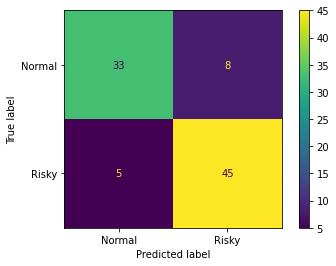

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Risky'])
disp.plot()
plt.show()

In [24]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20,input_shape=(30,),activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='binary_crossentropy',optimizer = opt ,metrics = ['accuracy']) 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
show_training_process = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[monitor])
model.summary()



Epoch 1/50
4/4 [==============================] - 1s 43ms/step - loss: 0.7478 - accuracy: 0.4481 - val_loss: 0.7821 - val_accuracy: 0.4505
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.7253 - accuracy: 0.4528 - val_loss: 0.7621 - val_accuracy: 0.4505
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 0.7066 - accuracy: 0.4481 - val_loss: 0.7447 - val_accuracy: 0.4505
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.4623 - val_loss: 0.7303 - val_accuracy: 0.4505
Epoch 5/50
4/4 [==============================] - 0s 7ms/step - loss: 0.6755 - accuracy: 0.4811 - val_loss: 0.7182 - val_accuracy: 0.4505
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 0.6644 - accuracy: 0.4764 - val_loss: 0.7062 - val_accuracy: 0.4396
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.6533 - accuracy: 0.4953 - val_loss: 0.6956 - val_accuracy: 0.4615
Epoch 8/50
4/4 [================

In [25]:
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

3/3 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.8571
Test results - Loss: 0.43490999937057495 - Accuracy: 85.71428656578064


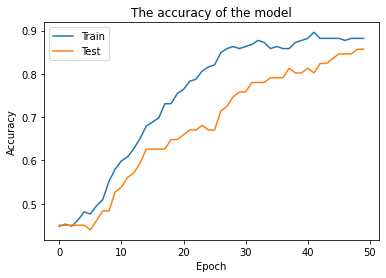

In [27]:
import matplotlib.pyplot as plt

plt.plot(show_training_process.history['accuracy'])
plt.plot(show_training_process.history['val_accuracy'])
plt.title('The accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()